# Overfitting 방지 실습

## Import modules

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 하이퍼파라미터 정의

In [2]:
EPOCHS = 50

## 네트워크 구조 정의

In [3]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()                       # 28x28 = 784
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout4 = tf.keras.layers.Dropout(0.5)
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')  # 10

    def call(self, x, training=False, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        h = self.dropout4(h)
        return self.dense5(h)

## 데이터 불러오기

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

## 모델 생성

In [5]:
model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Early Stopping Callback

In [6]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

## 모델 학습

In [7]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/50


W1110 06:20:51.417670 140536528553792 deprecation.py:323] From /home/jeyong/.conda/envs/tf2.0b1/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


1875/1875 [==============================] - 10s 5ms/step - loss: 0.5917 - accuracy: 0.7061 - val_loss: 0.4321 - val_accuracy: 0.8444
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4138 - accuracy: 0.8480 - val_loss: 0.4006 - val_accuracy: 0.8549
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3747 - accuracy: 0.8649 - val_loss: 0.4038 - val_accuracy: 0.8595
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3475 - accuracy: 0.8737 - val_loss: 0.3813 - val_accuracy: 0.8646
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3313 - accuracy: 0.8808 - val_loss: 0.3712 - val_accuracy: 0.8662
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3151 - accuracy: 0.8858 - val_loss: 0.3592 - val_accuracy: 0.8695
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3065 - accuracy: 0.8870 - val_loss: 0.3559 - val_accuracy: 0.8704
Ep

## Matplotlib을 이용한 시각화

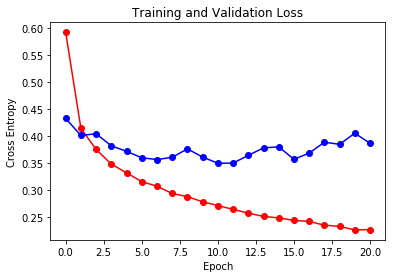

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()